In [0]:
dbutils.fs.ls("/FileStore/tables")

[FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709127648000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1710943982000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706707428000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020/', name='clinicaltrial_2020/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1714415966000),
 FileInfo(path='db

In [0]:
fileroot = "clinicaltrial_2023"

import os
os.environ['fileroot'] = fileroot



In [0]:
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip", "file:/tmp/")

True

In [0]:
%sh
unzip -d /tmp /tmp/$fileroot.zip

Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  


In [0]:
%sh
ls /tmp/

Rserv
Rtmp3geQ0C
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2023.csv
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
python_lsp_logs
systemd-private-84b1983c03394d87a86ac831aba0fc00-systemd-logind.service-HIOlWG
systemd-private-84b1983c03394d87a86ac831aba0fc00-systemd-resolved.service-BF0h4r
tmp.xyzSa9H5ws


In [0]:
dbutils.fs.mkdirs("/FileStore/tables/" + fileroot)

True

In [0]:
dbutils.fs.mv("file:/tmp/"+fileroot+".csv","/FileStore/tables/",True)

True

In [0]:
dbutils.fs.ls("/FileStore/tables/" + fileroot +".csv")

[FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.csv', name='clinicaltrial_2023.csv', size=292436366, modificationTime=1714638714000)]

In [0]:
dbutils.fs.ls("/FileStore/tables")

[FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709127648000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1710943982000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706707428000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020/', name='clinicaltrial_2020/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1714415966000),
 FileInfo(path='db

In [0]:
dbutils.fs.head("/FileStore/tables/"+fileroot+".csv")

[Truncated to first 65536 bytes]


'"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
# introducing Reusability and defining Filepath

clincaltrial_2023 = ("/FileStore/tables/"+fileroot+".csv")
pharma = ('/FileStore/tables/pharma.csv')

Load the Clinicaltrial  CSV fILE

In [0]:
#load the csv using spark content
clinicaltrial_2023rdd = sc.textFile(clincaltrial_2023)



#Cleaning the dataset

In [0]:
#clean  the dataset
clinicaltrial_2023rdd1 = clinicaltrial_2023rdd.map(lambda row: row.replace(',,', ''))


clinicaltrial_2023rdd1.take(3)



['"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion"',
 '"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",',
 '"NCT05992571\tOral Ketone Monoester Supplementation and Resting-state Brain Connectivity\t\tRECRUITING\tCerebrovascular Function|Cognition\tOTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB\tMcMaster University\tAlzheimer\'s Society of Brant", Haldi

In [0]:
clinicaltrial_2023rdd2 =clinicaltrial_2023rdd1.map(lambda line: line.strip(',\"').split('\t')) \
    .filter(lambda line: len(line) > 1)
header = clinicaltrial_2023rdd2.first()
clinicaltrial_2023rdd3 = clinicaltrial_2023rdd2.filter(lambda k:k!=header)

clinicaltrial_2023rdd3.collect()


[['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Function|Cognition',
  'OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB',
  'McMaster University',
  'Alzheimer\'s Society of Brant", Haldimand Norfolk," Hamilton Halton',
  '30.0',
  'OTHER',
  'INTERVENTIONAL',
  '

In [0]:
#checking our cleaned dataset
clinicaltrial_2023rdd2.collect()

[['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'],
 ['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Fun

In [0]:
#loading the pharma csv using the spark content
pharma_rdd = sc.textFile(pharma)

In [0]:
pharma_rdd2 = sc.textFile(pharma)\
                          .map(lambda line: line.split(','))\
                          .filter(lambda line: len(line)>1)



pharma_rdd2.take(10)

[['"Company"',
  '"Parent_Company"',
  '"Penalty_Amount"',
  '"Subtraction_From_Penalty"',
  '"Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting"',
  '"Penalty_Year"',
  '"Penalty_Date"',
  '"Offense_Group"',
  '"Primary_Offense"',
  '"Secondary_Offense"',
  '"Description"',
  '"Level_of_Government"',
  '"Action_Type"',
  '"Agency"',
  '"Civil/Criminal"',
  '"Prosecution_Agreement"',
  '"Court"',
  '"Case_ID"',
  '"Private_Litigation_Case_Title"',
  '"Lawsuit_Resolution"',
  '"Facility_State"',
  '"City"',
  '"Address"',
  '"Zip"',
  '"NAICS_Code"',
  '"NAICS_Translation"',
  '"HQ_Country_of_Parent"',
  '"HQ_State_of_Parent"',
  '"Ownership_Structure"',
  '"Parent_Company_Stock_Ticker"',
  '"Major_Industry_of_Parent"',
  '"Specific_Industry_of_Parent"',
  '"Info_Source"',
  '"Notes"'],
 ['"Abbott Laboratories"',
  '"Abbott Laboratories"',
  '"$5',
  '475',
  '000"',
  '"$0"',
  '"$5',
  '475',
  '000"',
  '"2013"',
  '"20131227"',
  '"government-contracting-related offenses"',


In [0]:
#filtering out the header
header = pharma_rdd2.first()
pharma_rdd3 = pharma_rdd2.filter(lambda k:k !=header)

pharma_rdd3.take(4)

[['"Abbott Laboratories"',
  '"Abbott Laboratories"',
  '"$5',
  '475',
  '000"',
  '"$0"',
  '"$5',
  '475',
  '000"',
  '"2013"',
  '"20131227"',
  '"government-contracting-related offenses"',
  '"False Claims Act and related"',
  '"kickbacks and bribery"',
  '"Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s carotid',
  ' biliary and peripheral vascular products."',
  '"federal"',
  '"agency action"',
  '"Justice Department Civil Division"',
  '"civil"',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '"USA"',
  '"Illinois"',
  '"publicly traded"',
  '"ABT"',
  '"pharmaceuticals"',
  '"pharmaceuticals"',
  '"https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians"',
  '""'],
 ['"Abbott Laboratories Inc."',
  '"AbbVie"',
  '"$1',
  '500',
  '000',
  '000"',
  '

In [0]:
# Apply transformations to create pharma_rdd4
pharma_rdd4 = pharma_rdd \
    .map(lambda x: x.replace('"', '')) \
    .map(lambda line: line.split(','))

# Print the first two lines of data
print(pharma_rdd4.take(4))


[['Company', 'Parent_Company', 'Penalty_Amount', 'Subtraction_From_Penalty', 'Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting', 'Penalty_Year', 'Penalty_Date', 'Offense_Group', 'Primary_Offense', 'Secondary_Offense', 'Description', 'Level_of_Government', 'Action_Type', 'Agency', 'Civil/Criminal', 'Prosecution_Agreement', 'Court', 'Case_ID', 'Private_Litigation_Case_Title', 'Lawsuit_Resolution', 'Facility_State', 'City', 'Address', 'Zip', 'NAICS_Code', 'NAICS_Translation', 'HQ_Country_of_Parent', 'HQ_State_of_Parent', 'Ownership_Structure', 'Parent_Company_Stock_Ticker', 'Major_Industry_of_Parent', 'Specific_Industry_of_Parent', 'Info_Source', 'Notes'], ['Abbott Laboratories', 'Abbott Laboratories', '$5', '475', '000', '$0', '$5', '475', '000', '2013', '20131227', 'government-contracting-related offenses', 'False Claims Act and related', 'kickbacks and bribery', "Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying

# 1) The number of studies in the dataset

In [0]:
# Extract the header
header = clinicaltrial_2023rdd1.first()

# Filter out the header line from the RDD
data_without_header = clinicaltrial_2023rdd1.filter(lambda line: line != header)

# Split each line by tabs, extract study identifier, and get distinct studies
distinct_studies = data_without_header.map(lambda line: line.strip(',"').split('\t')[0]).distinct()

# Count the number of distinct studies
num_distinct_studies = distinct_studies.count()

# Print the result
print("The number of distinct studies in the dataset (excluding header) is:", num_distinct_studies)


The number of distinct studies in the dataset (excluding header) is: 483422


#2)Types of Studies and their Frequencies

In [0]:
#  clinicaltrial_2023RDD is the initial RDD
clinicaltrial_2023RDD_st = clinicaltrial_2023rdd1.map(lambda k: (k.split("\t")[10] if len(k.split("\t")) > 10 else None, 1))

# Filter out records where the split didn't produce enough fields
clinicaltrial_2023RDD_st_filtered = clinicaltrial_2023RDD_st.filter(lambda x: x[0] is not None)

# Reduce by key, sort, and take the first 4 elements
clinicaltrial_rdd_studies = clinicaltrial_2023RDD_st_filtered.reduceByKey(lambda a, b: a + b) \
    .sortBy(lambda k: k[1], ascending=False)

# Take the first 4 elements for inspection
clinicaltrial_rdd_studies.take(4)

[('INTERVENTIONAL', 371382),
 ('OBSERVATIONAL', 110221),
 ('EXPANDED_ACCESS', 928),
 ('', 889)]

#3)The top 5 conditions (from Conditions) with their frequencies.

In [0]:
from operator import add

def get_top_5_conditions(clinicaltrial_data):
    """
    This function takes clinical trial data as input and returns the top 5 conditions 
    based on frequency of occurrence.
    
    Parameters:
    clinicaltrial_data (RDD): RDD containing clinical trial data.
    
    Returns:
    list: Top 5 conditions with their respective frequencies.
    """
    top_5_conditions = clinicaltrial_data \
        .map(lambda col: col[4]) \
        .filter(lambda x: x != '') \
        .flatMap(lambda x: x.split('|')) \
        .map(lambda x: (x, 1)) \
        .reduceByKey(add) \
        .sortBy(lambda x: x[1], ascending=False) \
        .take(5)
    
    return top_5_conditions

# clinicaltrial_2023RDD2 is your RDD
top_5_Conditions = get_top_5_conditions(clinicaltrial_2023rdd2)

# Displaying the top 5 Conditions
print(top_5_Conditions)


[('Healthy', 9731), ('Breast Cancer', 7502), ('Obesity', 6549), ('Stroke', 4071), ('Hypertension', 4020)]


In [0]:
header = clinicaltrial_2023rdd1.first()
clinicaltrialsponsors_rdd = clinicaltrial_2023rdd1.filter(lambda k:k !=header)\
.map(lambda k: k.split("\t"))\
.map(lambda k: (k[6],1))
clinicaltrialsponsors_rdd.take(5)


[('Sangath', 1),
 ('McMaster University', 1),
 ('Melbourne Health', 1),
 ('Assistance Publique - Hôpitaux de Paris', 1),
 ('Istituto Auxologico Italiano', 1)]

In [0]:
#splitting by delimiter, replacing, selecting index, and mapping
pcc_rdd = pharma_rdd.map(lambda k: k.split(","))\
.map(lambda k: (k[1].replace('"', '')))\
.map(lambda k: (k,1)) 

pcc_rdd.take(4)

[('Parent_Company', 1),
 ('Abbott Laboratories', 1),
 ('AbbVie', 1),
 ('AbbVie', 1)]

#4)10 most common sponsors that are not pharmaceutical companies, al

In [0]:
#joining sponsors data with parent companies that are not pharmaceutical companies
sponsors = clinicaltrialsponsors_rdd.leftOuterJoin(pcc_rdd)\
.filter(lambda k: k[1][1]==None)\
.map(lambda k: (k[0],1))\
.reduceByKey(lambda a,b: a+b)\
.sortBy(lambda k: k[1], False)

sponsors.take(10)

[('National Cancer Institute (NCI)', 3410),
 ('Assiut University', 3335),
 ('Cairo University', 3023),
 ('Assistance Publique - Hôpitaux de Paris', 2951),
 ('Mayo Clinic', 2766),
 ('M.D. Anderson Cancer Center', 2702),
 ('Novartis Pharmaceuticals', 2393),
 ('National Institute of Allergy and Infectious Diseases (NIAID)', 2340),
 ('Massachusetts General Hospital', 2263),
 ('National Taiwan University Hospital', 2181)]

#5)Plot number of completed studies for each month in 2023. 

In [0]:
year = '2023'
Completed_Studies = clinicaltrial_2023rdd2 \
    .map(lambda col: (col[3], col[-1])) \
    .filter(lambda x: x[0] == 'COMPLETED') \
    .map(lambda x: x[1]) \
    .filter(lambda x: x.split('-')[0] == year) \
    .map(lambda x: (x.split('-')[1], 1)) \
    .reduceByKey(lambda x, y: x + y) \
    .sortByKey()

Completed_Studies.collect()

[('01', 1494),
 ('02', 1272),
 ('03', 1552),
 ('04', 1324),
 ('05', 1415),
 ('06', 1619),
 ('07', 1360),
 ('08', 1230),
 ('09', 1152),
 ('10', 1058),
 ('11', 909),
 ('12', 1082)]

In [0]:
def changer(month):
    month_dict = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}
    return month_dict.get(month, None)

changed_months = Completed_Studies.map(lambda x: changer(x[0])).collect()

print("Changed months after applying changer function:")
print(changed_months)


Changed months after applying changer function:
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [0]:
# Apply changer function and filter out None values
Completed_Studies_final = Completed_Studies.map(lambda x: (changer(x[0]), x[1])) \
    .filter(lambda x: x[0] is not None) \
    .sortBy(lambda x: x[0], ascending=True) \
    .map(lambda x: (x[0], x[1]))

# Collect the sorted months along with the counts into a list
result = Completed_Studies_final.collect()

# Print the final result
print("Completed_Studies_final:")
print(result)

Completed_Studies_final:
[('Apr', 1324), ('Aug', 1230), ('Dec', 1082), ('Feb', 1272), ('Jan', 1494), ('Jul', 1360), ('Jun', 1619), ('Mar', 1552), ('May', 1415), ('Nov', 909), ('Oct', 1058), ('Sep', 1152)]


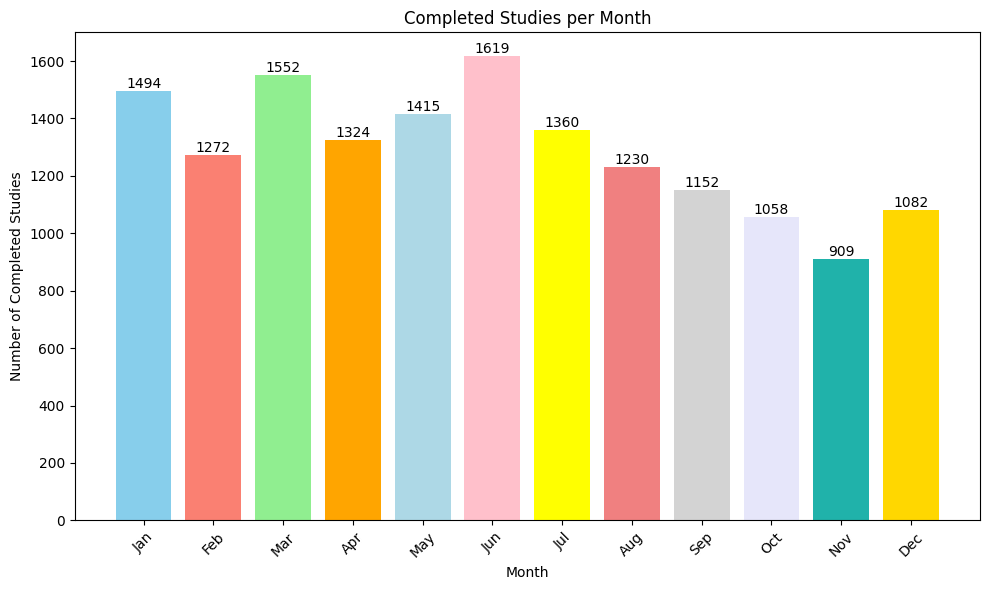

In [0]:
import matplotlib.pyplot as plt

# Extract months and counts from the result
months, counts = zip(*result)

# Define all months
all_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a dictionary to hold counts for each month
counts_dict = dict(zip(months, counts))

# Fill in counts for missing months
complete_counts = [counts_dict.get(month, 0) for month in all_months]

# Define custom colors for each bar
custom_colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightblue', 'pink', 'yellow', 'lightcoral', 'lightgray', 'lavender', 'lightseagreen', 'gold']

# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))
bars = plt.bar(all_months, complete_counts, color=custom_colors)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Completed Studies')
plt.title('Completed Studies per Month')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add value labels on top of each bar
for bar, count in zip(bars, complete_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


#Further Analysis
#Plot the number of Terminated studies in 2023

In [0]:
year = '2023'
Terminated_Studies = clinicaltrial_2023rdd2 \
    .map(lambda col: (col[3], col[-1])) \
    .filter(lambda x: x[0] == 'TERMINATED') \
    .map(lambda x: x[1]) \
    .filter(lambda x: x.split('-')[0] == year) \
    .map(lambda x: (x.split('-')[1], 1)) \
    .reduceByKey(lambda x, y: x + y) \
    .sortByKey()
Terminated_Studies.collect()

[('01', 150),
 ('02', 146),
 ('03', 164),
 ('04', 118),
 ('05', 142),
 ('06', 127),
 ('07', 115),
 ('08', 114),
 ('09', 103),
 ('10', 99),
 ('11', 99),
 ('12', 83)]

In [0]:
def changer(month):
    month_dict = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}
    return month_dict.get(month, None)

changed_months = Terminated_Studies.map(lambda x: changer(x[0])).collect()

print("Changed months after applying changer function:")
print(changed_months)

Changed months after applying changer function:
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [0]:
# Apply changer function and filter out None values
Terminated_Studies_final = Terminated_Studies.map(lambda x: (changer(x[0]), x[1])) \
    .filter(lambda x: x[0] is not None) \
    .sortBy(lambda x: x[0], ascending=True) \
    .map(lambda x: (x[0], x[1]))

# Collect the sorted months along with the counts into a list
results = Terminated_Studies_final.collect()

# Print the final result
print("Terminated_Studies_final:")
print(results)

Terminated_Studies_final:
[('Apr', 118), ('Aug', 114), ('Dec', 83), ('Feb', 146), ('Jan', 150), ('Jul', 115), ('Jun', 127), ('Mar', 164), ('May', 142), ('Nov', 99), ('Oct', 99), ('Sep', 103)]


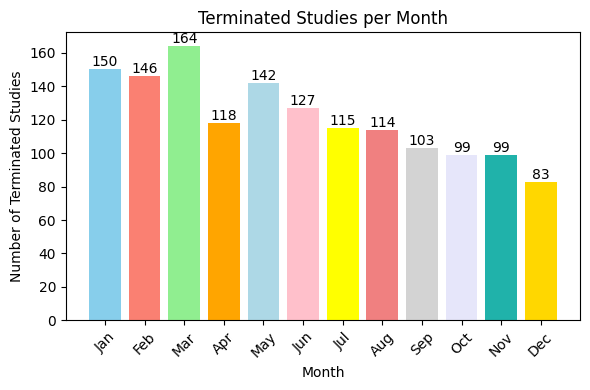

In [0]:
import matplotlib.pyplot as plt

# Extract months and counts from the result
months, counts = zip(*results)

# Define all months
all_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a dictionary to hold counts for each month
counts_dict = dict(zip(months, counts))

# Fill in counts for missing months
complete_counts = [counts_dict.get(month, 0) for month in all_months]

# Define custom colors for each bar
custom_colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightblue', 'pink', 'yellow', 'lightcoral', 'lightgray', 'lavender', 'lightseagreen', 'gold']

# Create a bar plot with custom colors
plt.figure(figsize=(6, 4))
bars = plt.bar(all_months, complete_counts, color=custom_colors)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Terminated Studies')
plt.title('Terminated Studies per Month')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add value labels on top of each bar
for bar, count in zip(bars, complete_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()
